## Analyze periodic spectral params 

### Settings

In [1]:
# Define paths
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'

# Imports
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [2]:
# load LFP spectral params results by bands
results = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_spectral_params_bands.csv", index_col=0)

### Compute stimulus-evoked change in periodic params

In [3]:
# split into two dataframes (enconding and baseline)
results_pre = results.loc[results["epoch"]=="pre"]
results_post = results.loc[results["epoch"]=="post"]

In [4]:
# merge two dataframes with suffixes for baseline and encoding
df_merge = results_post.merge(results_pre, on=['session','channel','chan_idx','array'], suffixes=['_post', '_pre'])
df_merge = df_merge.drop(columns=['epoch_pre','epoch_post'])

# compute difference
varname = ['offset', 'knee', 'exponent', 'r_squared', 'alpha_cf', 'alpha_bw', 'alpha_pw', 'beta_cf', 'beta_bw', 'beta_pw', 'gamma_cf', 'gamma_bw', 'gamma_pw']
for var in varname : 
    df_merge[f'{var}_diff'] = df_merge[f'{var}_post'] - df_merge[f'{var}_pre']

df_merge.head()

,session,channel,chan_idx,array,offset_post,knee_post,exponent_post,alpha_cf_post,alpha_pw_post,alpha_bw_post,...,r_squared_diff,alpha_cf_diff,alpha_bw_diff,alpha_pw_diff,beta_cf_diff,beta_bw_diff,beta_pw_diff,gamma_cf_diff,gamma_bw_diff,gamma_pw_diff
0,A_SNR_140819,0,0,1,9.902206,219236.318575,4.409639,NaN,NaN,NaN,...,0.000726,NaN,NaN,NaN,-0.034845,-7.940609,-0.130700,-0.578055,3.720626,-0.100972
1,A_SNR_140819,1,1,1,9.889650,297544.240066,4.448360,NaN,NaN,NaN,...,0.000232,NaN,NaN,NaN,-0.123659,-7.940346,-0.126266,-0.052047,4.464332,-0.127631
2,A_SNR_140819,2,2,1,8.637309,15271.606430,3.612422,NaN,NaN,NaN,...,-0.001323,NaN,NaN,NaN,2.209229,-5.706540,-0.076205,NaN,NaN,NaN
3,A_SNR_140819,3,3,1,10.169225,671155.781206,4.637297,NaN,NaN,NaN,...,-0.000163,NaN,NaN,NaN,0.012833,-8.581583,-0.143561,24.208630,42.634937,-0.165381
4,A_SNR_140819,4,4,1,9.680232,203919.954710,4.350254,NaN,NaN,NaN,...,0.000347,NaN,NaN,NaN,0.597425,-6.703987,-0.097408,15.633766,30.552993,-0.184489


In [12]:
# save results (overwrite spectral_params_bands.csv)
df_merge.to_csv(f'{PROJECT_PATH}/data/results/lfp_spectral_merged_bands.csv')

### Plot


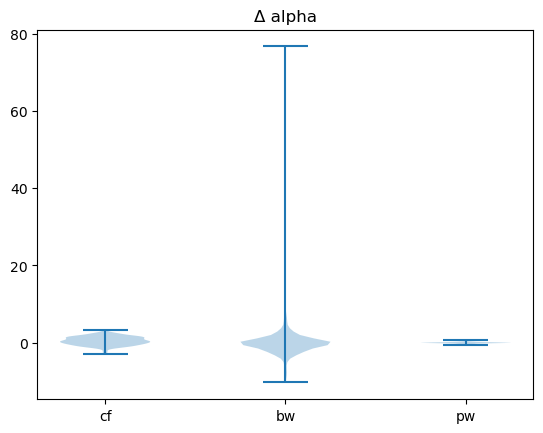

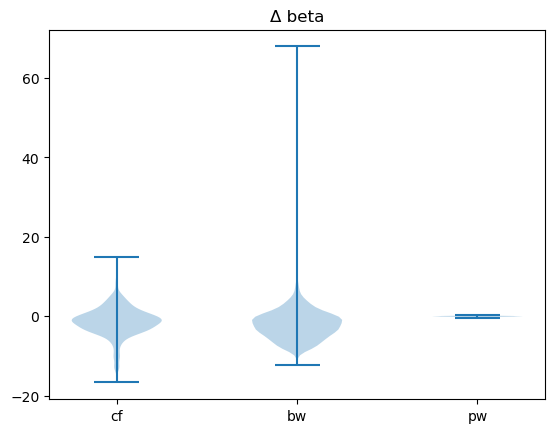

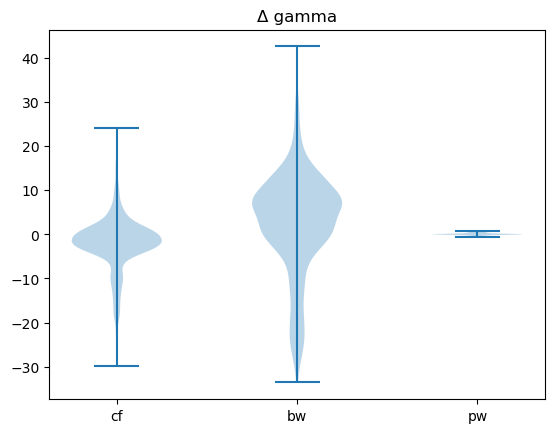

In [22]:
bands = ['alpha', 'beta', 'gamma']

# plot configuration
pos = [1, 2, 3]
label = ['cf', 'bw', 'pw']

for b in bands:
    # create dataframe for violin plot
    band_df = pd.DataFrame()
    band_df['cf'] = df_merge[f'{b}_cf_diff'].dropna()
    band_df['pw'] = df_merge[f'{b}_bw_diff'].dropna()
    band_df['bw'] = df_merge[f'{b}_pw_diff'].dropna()

    fig, ax = plt.subplots()

    ax.violinplot(band_df)
    ax.set_title(f"\u0394 {b}")
    ax.set_xticks(pos)
    ax.set_xticklabels(label)
    plt.show()

    fig.savefig(fr"G:\Shared drives\v1_v4_1024\figures\periodic\{b}_diff.png")